Automatically created module for IPython interactive environment
Training the SVM
Testing the SVM


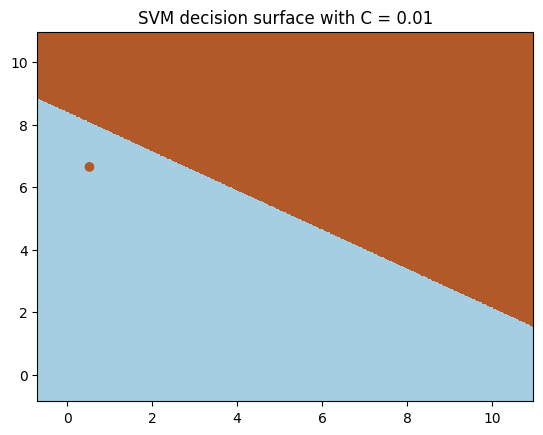

In [1]:
## run example_smv.py

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# load the data
filename = 'data/svmData.dat'
allData = np.loadtxt(filename, delimiter=',')

X = allData[:,:-1]
Y = allData[:,-1]


C = 0.01

# train the SVM
print ("Training the SVM")
clf = svm.SVC(C=C,kernel='linear')
clf.fit(X, Y)

# print ""
print ("Testing the SVM")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('SVM decision surface with C = '+str(C))
plt.axis('tight')
plt.show()


Automatically created module for IPython interactive environment
Training the SVM
Size X1 =  (150, 2)
Size X2 =  (150, 2)
Testing the SVM
Size X1 =  (61600, 2)
Size X2 =  (150, 2)


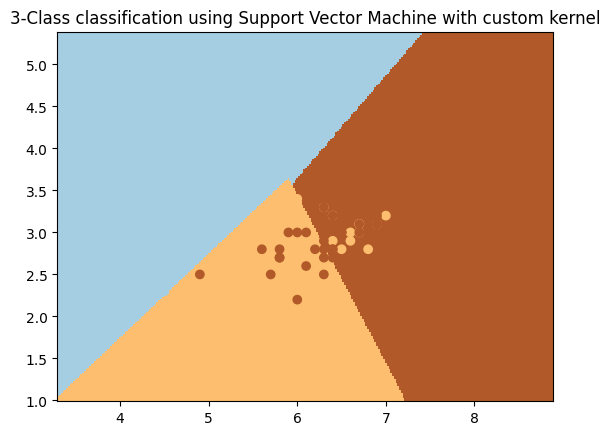

In [2]:
## run example_svmCustomKernel.py


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target


def myCustomKernel(X1, X2):
    """
    Custom kernel:
    k(X1, X2) = X1  (3  0) X2.T
                    (0  2)
    """
    print ("Size X1 = ", X1.shape)
    print ("Size X2 = ", X2.shape)
    M = np.matrix([[3.0, 0], [0, 2.0]])
    return np.dot(np.dot(X1, M), X2.T)


h = .02  # step size in the mesh

# we create an instance of SVM with the custom kernel and train it
print ("Training the SVM")
clf = svm.SVC(kernel=myCustomKernel)
clf.fit(X, Y)

# print ""
print ("Testing the SVM")

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('3-Class classification using Support Vector Machine with custom kernel')
plt.axis('tight')
plt.show()


Automatically created module for IPython interactive environment
Training the SVMs...
Testing the SVMs...


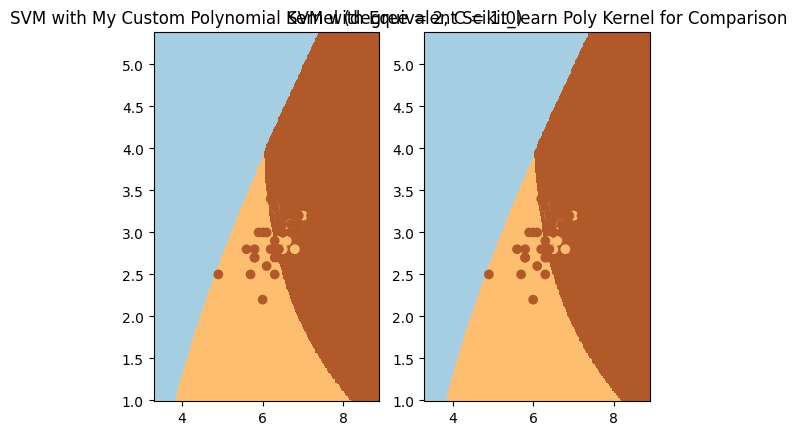

In [6]:
## test_svmPolyKernel.py


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from svmKernels import myPolynomialKernel
from svmKernels import _polyDegree

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

print ("Training the SVMs...")

C = 1.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C = C, kernel=myPolynomialKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in poly kernel and train it
model = svm.SVC(C = C, kernel='poly', degree=_polyDegree, coef0=1, gamma=1)
model.fit(X, Y)

# print ""
print ("Testing the SVMs...")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title("SVM with My Custom Polynomial Kernel (degree = "+str(_polyDegree) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title('SVM with Equivalent Scikit_learn Poly Kernel for Comparison')
plt.axis('tight')

plt.show()


Automatically created module for IPython interactive environment
Training the SVMs...
Testing the SVMs...


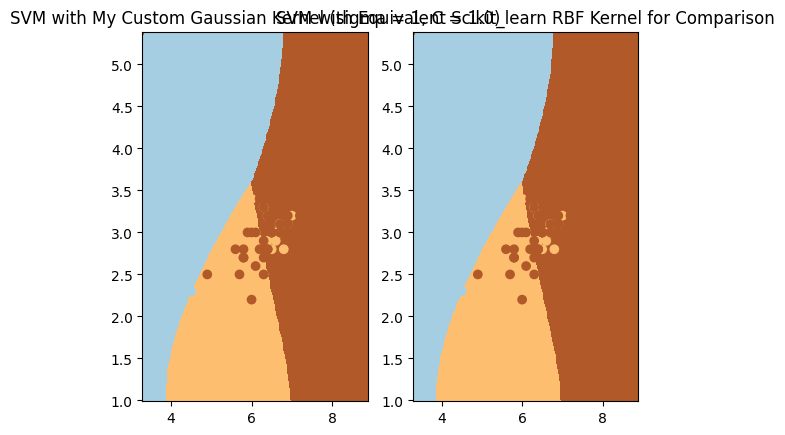

In [7]:
## run test_svmGaussianKernel.py


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from svmKernels import myGaussianKernel
from svmKernels import _gaussSigma

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

print ("Training the SVMs...")

C = 1.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C = C, kernel=myGaussianKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in RBF kernel and train it
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C = C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

# print ""
print ("Testing the SVMs...")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title("SVM with My Custom Gaussian Kernel (sigma = "+str(_gaussSigma) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()
